# Getting started
This page provides instructions for installing `lsdo_genie` 
and running a minimal example.

## Installation for users
For direct installation with all dependencies, run on the terminal or command line
```sh
$ pip install git+https://github.com/LSDOlab/lsdo_genie.git
```

## Installation instructions for developers
To install `lsdo_genie`, first clone the repository and install using pip.
On the terminal or command line, run
```sh
$ git clone https://github.com/LSDOlab/lsdo_genie.git
$ pip install -e ./lsdo_genie
```

## Minimal example
This example will generate a constraint function for a circle, where the interior is positive (feasible).

In [11]:
from lsdo_genie import Genie2D
import numpy as np

# Define a circle with outward pointing normal vectors
radius = 5.
num_pts = 40
theta = np.linspace(0,2*np.pi,num_pts,endpoint=False)
surface_points = radius*np.stack((np.cos(theta),np.sin(theta)),axis=1)
surface_normals = np.stack((np.cos(theta),np.sin(theta)),axis=1)
# Domain of interest
custom_domain = np.array([
    [-2*radius, 2*radius],
    [-2*radius, 2*radius],
])
# Initialize Genie instance in 2D, then setup and solve the energy minimization problem
genie = Genie2D()
genie.input_point_cloud(
    surface_points=surface_points,
    surface_normals=surface_normals,
)
genie.config(
    domain=custom_domain,
    max_control_points=30,
    min_ratio=0.75,
)
genie.solve_energy_minimization(
    Ln=1e0,
    Lr=1e-4,
)
print(f"Time to solve: {genie.timetosolve:1.3e} sec")
# Compute phi along the boundary (should be the zero level set)
phi = genie.compute_phi(surface_points)
print(f"Zero level set error: {np.linalg.norm(phi):1.3e}")

Time to solve: 3.391e-03 sec
Zero level set error: 9.608e-04


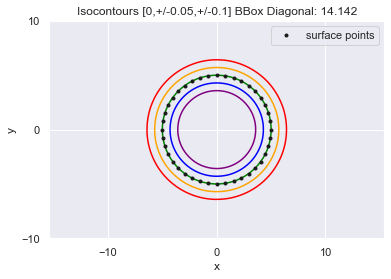

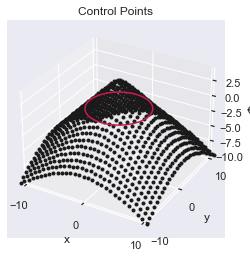

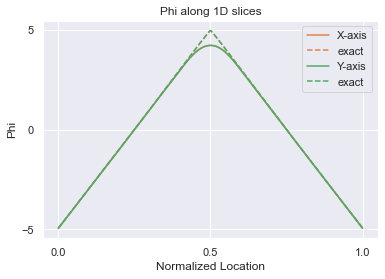

In [12]:
# Convenient visualization to verify results
genie.visualize()